# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code: import the dataframe
sat_17 = pd.read_csv('./data/sat_2017.csv')
act_17 = pd.read_csv('./data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code: display first 10 rows
display(sat_17.head(10))
display(act_17.head(10))

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: On the SAT 2017 dataset, it does not give me the details of total of number of students registed to SAT or other details, so the participation is hard to compare to other state and it makes harder to diving in the details if we want to do a comparison. On the ACT 2017, it has same problem with the participation data.

#### 4a. Does the data look complete? 

Yes and No. The reason why it is yes, it does include all the test section. 
However, it does not indicate which year and whict test the data belong to.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

By given the dataset, I can't tell which test is corresponding to which test. And looks like the type of Participation is hard to tell what type of datatype.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [4]:
#code
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [5]:
display(sat_17.shape)
display(act_17.shape) # there is extra row in the dataframe

(51, 5)

(52, 7)

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
display(sat_17.dtypes)
display(act_17.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
Yes.
- Which ones are not as they should be?  
The Participation of SAT should be integer or float. The ACT composite should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [7]:
# removing % in the Participation column in order to conver the string number into integer for future analysis
def remove(a):
    new_participation = int(a.strip("%"))
    return new_participation
sat_17['Participation'] = sat_17['Participation'].apply(remove)

In [8]:
# removing % in the Participation column in order to conver the string number into integer for future analysis
def remove(a):
    new_participation = int(a.strip("%"))
    return new_participation
act_17['Participation'] = act_17['Participation'].apply(remove)

- Fix any individual values preventing other columns from being the appropriate type.

In [9]:
act_17.loc[51]

State            Wyoming
Participation        100
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite          20.2x
Name: 51, dtype: object

In [10]:
#using lamda function to remove the "x" at the ACT dataset
act_17['Composite'] = act_17['Composite'].apply(lambda x: x.strip("x"))

In [11]:
act_17.loc[51]

State            Wyoming
Participation        100
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

In [12]:
# convert composite datatype as object into float
act_17['Composite'] = act_17['Composite'].apply(lambda x: float(x))

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [13]:
#Code:
display(sat_17.dtypes)
display(act_17.dtypes)

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [14]:
#code
# rename all the columns in SAT and ACT
sat_17.columns = sat_17.columns.map({'State': 'state',
                         'Participation': 'sat_17_participation',
                         'Evidence-Based Reading and Writing': 'sat_17_evi_reading_and_writing',
                         'Math':'sat_17_math',
                         'Total':'sat_17_total_score'})

act_17.columns = act_17.columns.map({'State': 'state',
                         'Participation': 'act_17_participation',
                         'English': 'act_17_english',
                        'Math':'act_17_math',
                        'Reading':'act_17_reading',
                        'Science':'act_17_science',
                        'Composite':'act_17_composite'})


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sat_17_state**|object|2017 SAT|Where students took their SAT|
|**sat_17_participation**|*int*|2017 SAT|The avearge Participation rate of SAT in this State| 
|**sat_17_evi_reading_and_writing**|*integer*|SAT|The average score of Evidence_based Reading and Writing part in SAT | 
|**sat_17_math**|*integer*|2017 SAT|The average score of math in SAT| 
|**sat_17_total_score**|*integer*|2017 SAT|The total of average score of Reading & Writing and Math in SAT|
|**act_17_state**|*object*|2017 ACT|where students took their ACT|
|**act_17_participation**|*integer*|2017 ACT|The average Participation rate in ACT|
|**act_17_english**|*integer*|2017 ACT|The average score of English part in ACT|
|**act_17_math**|*integer*|2017 ACT|The average score of Math part in ACT|
|**act_17_reading**|*integer*|2017 ACT|The average score of Reading part in ACT|
|**act_17_science**|*integer*|2017 ACT|The average score of Science part in ACT|
|**act_17_composite**|*integer*|2017 ACT|The average score of Composite part in ACT|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [15]:
#code # recall the shape to identify which dataframe to have extra row, which is the ACT 2017
display(sat_17.shape)
display(act_17.shape)

(51, 5)

(52, 7)

In [16]:
act_17.drop(index = 0, inplace = True)

In [17]:
act_17.head() # check if the row is removed

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
#Code: 
# using "on" is to identify the common column to merge two tables

combined_2017 = pd.merge(sat_17, act_17, on = 'state')
combined_2017.head()

,state,sat_17_participation,sat_17_evi_reading_and_writing,sat_17_math,sat_17_total_score,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
#code
path = '~/GA/Projects-GA/project_1/code/data/'
combined_2017.to_csv(path + 'combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [20]:
sat_18 = pd.read_csv('./data/SAT_2018.csv')
act_18 = pd.read_csv('./data/ACT_2018.csv')

In [21]:
display(sat_18.columns)
display(act_18.columns)

Index(['State', ' Participation', ' Total '], dtype='object')

Index(['State', 'Participation', 'Composite'], dtype='object')

In [22]:
sat_18.columns = sat_18.columns.map({'State': 'state',
                         ' Participation': 'sat_18_participation',
                         ' Total ':'sat_18_total_score'})

act_18.columns = act_18.columns.map({'State': 'state',
                         'Participation': 'act_18_participation',
                        'Composite':'act_18_composite'})

In [23]:
# to check the the dataframe data looks right to me
display(sat_18.info())
display(act_18.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
state                   51 non-null object
sat_18_participation    51 non-null int64
sat_18_total_score      51 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
state                   51 non-null object
act_18_participation    51 non-null int64
act_18_composite        51 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


None

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [24]:
# merge three files by merging first two files, then add the next one, what if there are a lot of files need to merge?
final = pd.merge(combined_2017, sat_18, on = 'state').merge(act_18, on = 'state')
final.head()

,state,sat_17_participation,sat_17_evi_reading_and_writing,sat_17_math,sat_17_total_score,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_total_score,act_18_participation,act_18_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,1166,100,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,1106,33,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,1149,66,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,1169,100,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,1076,27,22.7


In [25]:
path = '~/GA/Projects-GA/project_1/code/data/'
final.to_csv(path + 'final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [27]:
final.describe()

,sat_17_participation,sat_17_evi_reading_and_writing,sat_17_math,sat_17_total_score,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_total_score,act_18_participation,act_18_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,46.627451,1124.666667,61.686275,21.498039
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,38.014187,93.868561,34.035564,2.117686
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,977.000000,7.000000,17.700000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,1062.500000,28.500000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,1099.000000,66.000000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,79.500000,1220.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,1298.000000,100.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [28]:
def std_dev(data):
    n = len(data)
    mean = sum(data)/n
    total = 0
    for i in data:
        total += (i - mean) ** 2
    return (total/n) ** .5

In [29]:
std_dev(final['sat_17_evi_reading_and_writing'])

45.21697020437866

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [30]:
final.columns[1:]

Index(['sat_17_participation', 'sat_17_evi_reading_and_writing', 'sat_17_math',
       'sat_17_total_score', 'act_17_participation', 'act_17_english',
       'act_17_math', 'act_17_reading', 'act_17_science', 'act_17_composite',
       'sat_18_participation', 'sat_18_total_score', 'act_18_participation',
       'act_18_composite'],
      dtype='object')

In [31]:
#Code:myDict = { k:v for (k,v) in zip(keys, values)} 
data_std_dev = { key : std_dev(final[key]) for key in final.columns[1:]}


In [32]:
std_dev(final['sat_17_evi_reading_and_writing'])

45.21697020437866

In [33]:
data_std_dev

{'sat_17_participation': 34.92907076664508,
 'sat_17_evi_reading_and_writing': 45.21697020437866,
 'sat_17_math': 84.07255521608297,
 'sat_17_total_score': 91.58351056778743,
 'act_17_participation': 31.824175751231806,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 3.151107895464408,
 'act_17_composite': 2.000786081581989,
 'sat_18_participation': 37.63965409204986,
 'sat_18_total_score': 92.94372462792965,
 'act_18_participation': 33.700229938168505,
 'act_18_composite': 2.0968220768561987}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Yes, it does match up with describe as well as numpy's std (see below).

In [35]:
# using numpy std function to check if it match up with describe function
np.std(final)

sat_17_participation              34.929071
sat_17_evi_reading_and_writing    45.216970
sat_17_math                       84.072555
sat_17_total_score                91.583511
act_17_participation              31.824176
act_17_english                     2.330488
act_17_math                        1.962462
act_17_reading                     2.046903
act_17_science                     3.151108
act_17_composite                   2.000786
sat_18_participation              37.639654
sat_18_total_score                92.943725
act_18_participation              33.700230
act_18_composite                   2.096822
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year? ( both years)

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [38]:
#code
## 2017 SAT ## 

#Which states have the highest participation rates for 2017 SAT
sat_17_lowest_p = final.sort_values(by ='sat_17_participation',ascending = False).iloc[: , 0:2]
display(sat_17_lowest_p.head())
print("The above table showes the top 5 states that have the higest participation rate for 2017 SAT.")

#Which states have the lowest participation rates for the 2017 SAT
sat_17_lowest_p = final.sort_values(by = 'sat_17_participation',ascending = True).iloc[: , 0:2]
display(sat_17_lowest_p.head())
print("The above table showes the bottom 5 states that have the lowest participation rate for 2017 SAT.")

## 2018 SAT ##

#Which states have the higest participation rates for the 2018 SAT
sat_18_highest_p = final.sort_values(by = 'sat_18_participation',ascending = False)
display(sat_18_highest_p.head().iloc[: , [0,11]])
print("The above table showes top 5 states that have highest particpation rate for 2018 SAT")

#Which states have the lowest participation rates for the 2018 SAT
sat_18_lowest_p = final.sort_values(by = 'sat_18_participation',ascending = True)
display(sat_18_lowest_p.head().iloc[: , [0,11]])
print("The above table showes bottom 5 states that have the lowest participation rate for 2018 SAT")



,state,sat_17_participation
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


The above table showes the top 5 states that have the higest participation rate for 2017 SAT.


,state,sat_17_participation
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


The above table showes the bottom 5 states that have the lowest participation rate for 2017 SAT.


,state,sat_18_participation
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100


The above table showes top 5 states that have highest particpation rate for 2018 SAT


,state,sat_18_participation
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


The above table showes bottom 5 states that have the lowest participation rate for 2018 SAT


In [39]:
## ACT 2017 ##

#Which states have the highest participation rates for the 2017 ACT
act_17_highest_p = final.sort_values(by ='act_17_participation',ascending = False)
display(act_17_highest_p.head().iloc[: , [0,5]])
print("The above table showes top 5 stats that have the highest participation rate for 2017 ACT")

#Which states have the lowest participation rates for the 2017 ACT
act_17_lowest_p = final.sort_values(by = 'act_17_participation',ascending = True)
display(act_17_lowest_p.head().iloc[: , [0,5]])
print("The above table showes bottom 5 states that have the lowest participation rate for 2017 ACT")


## ACT 2018 ##

#Which states have the highest participation rates for the 2018 ACT
act_18_highest_p = final.sort_values(by = 'act_18_participation',ascending = False)
display(act_18_highest_p.head().iloc[: , [0,13]])
print("The above table showes top 5 states that have the highest PARTICIPATION RATE FOR 2018 ACT")

#Which states have the lowest participation rates for the 2018 ACT
act_18_lowest_p = final.sort_values(by = 'act_18_participation',ascending = True)
display(act_18_lowest_p.head().iloc[: , [0,13]])
print("The above table showes bottom 5 states that have the lowest participation rate for 2018 ACT")



,state,act_17_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


The above table showes top 5 stats that have the highest participation rate for 2017 ACT


,state,act_17_participation
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


The above table showes bottom 5 states that have the lowest participation rate for 2017 ACT


,state,act_18_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


The above table showes top 5 states that have the highest PARTICIPATION RATE FOR 2018 ACT


,state,act_18_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


The above table showes bottom 5 states that have the lowest participation rate for 2018 ACT


In [44]:
# Which states have the highest and lowest mean TOTAL scores for SAT (2017 & 2018)

#2017 SAT

# Which states have the highest mean scores in 2017 SAT?
sat_17_highest_score = final.sort_values(by ='sat_17_total_score',ascending = False)
display(sat_17_highest_score.iloc[:1 , [0,4]])
print("Minnesota has the higest mean scores for 2017 SAT.")

## Which states have the lowest mean scores in 2017 SAT?
sat_17_lowest_score = final.sort_values(by ='sat_17_total_score',ascending = True)
display(sat_17_lowest_score.iloc[:1 , [0,4]])
print("District of Columbia has lowest mean scores for 2017 SAT.")

#2018 SAT

# Which states have the highest mean scores in 2018 SAT?
sat_18_highest_score = final.sort_values(by ='sat_18_total_score',ascending = False)
display(sat_18_highest_score.iloc[:1 , [0,12]])
print("Minnesota has the highest mean scores for 2018 SAT.")

## Which states have the lowest mean scores in 2018 SAT?
sat_18_lowest_score = final.sort_values(by ='sat_18_total_score',ascending = True)
display(sat_18_lowest_score.iloc[:1 , [0,12]])
print("District of Columbia has the lowest mean scores for 2018 SAT.")


,state,sat_17_total_score
23,Minnesota,1295


Minnesota has the higest mean scores for 2017 SAT.


,state,sat_17_total_score
8,District of Columbia,950


District of Columbia has lowest mean scores for 2017 SAT.


,state,sat_18_total_score
23,Minnesota,1298


Minnesota has the highest mean scores for 2018 SAT.


,state,sat_18_total_score
8,District of Columbia,977


District of Columbia has the lowest mean scores for 2018 SAT.


In [45]:
# Which states have the highest and lowest mean composite scores for the 2017 ACT

#2017 ACT

# Which states have the highest mean scores in 2017 ACT?
act_17_highest_compo = final.sort_values(by ='act_17_composite',ascending = False)
display(act_17_highest_compo.iloc[:1 , [0,10]])
print("New Hampshire has higest mean scores for 2017 ACT.")

## Which states have the lowest mean scores in 2017 ACT?
act_17_lowest_compo = final.sort_values(by ='act_17_composite',ascending = True)
display(act_17_lowest_compo.iloc[:1 , [0,10]])
print("Nevada has the lowest mean scores for 2017 ACT.")


#2018 ACT

# Which states have the highest mean scores in 2018 ACT?
act_18_highest_compo = final.sort_values(by ='act_18_composite',ascending = False)
display(act_18_highest_compo.iloc[:1 , [0,14]])
print("Connecticut has the higest mean scores for 2018 ACT.")

## Which states have the lowest mean scores in 2018 ACT?
act_18_lowest_compo = final.sort_values(by ='act_18_composite',ascending = True)
display(act_18_lowest_compo.iloc[:1 , [0,14]])
print("Nevada lowest mean scores for 2018 ACT.")

,state,act_17_composite
29,New Hampshire,25.5


New Hampshire has higest mean scores for 2017 ACT.


,state,act_17_composite
28,Nevada,17.8


Nevada has the lowest mean scores for 2017 ACT.


,state,act_18_composite
6,Connecticut,25.6


Connecticut has the higest mean scores for 2018 ACT.


,state,act_18_composite
28,Nevada,17.7


Nevada lowest mean scores for 2018 ACT.


In [46]:
#states with 100% participation on SAT have a rate change 
final.loc[(final['sat_17_participation']) == 100][['state', 'sat_17_participation', 'sat_18_participation']]

,state,sat_17_participation,sat_18_participation
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,100,92
22,Michigan,100,100


In [47]:
#states with 100% participation on ACT have a rate change 
final[(final['act_17_participation']) == 100][['state', 'act_17_participation', 'act_18_participation']].head()

,state,act_17_participation,act_18_participation
0,Alabama,100,100
3,Arkansas,100,100
5,Colorado,100,30
17,Kentucky,100,100
18,Louisiana,100,100


In [48]:
#states show have >50% participation on ACT For both 2017 and 2018
final[(final['act_17_participation'] > 50) & (final['act_18_participation'] > 50)  ][['state', 'act_17_participation', 'act_18_participation']].head()

,state,act_17_participation,act_18_participation
0,Alabama,100,100
2,Arizona,62,66
3,Arkansas,100,100
9,Florida,73,66
10,Georgia,55,53


In [49]:
#states show have >50% participation on SAT For both 2017 and 2018
final[(final['sat_17_participation'] > 50) & (final['sat_18_participation'] > 50)  ][['state', 'sat_17_participation', 'sat_18_participation']].head()

,state,sat_17_participation,sat_18_participation
4,California,53,60
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,100,92
9,Florida,83,97


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [50]:
import seaborn as sns

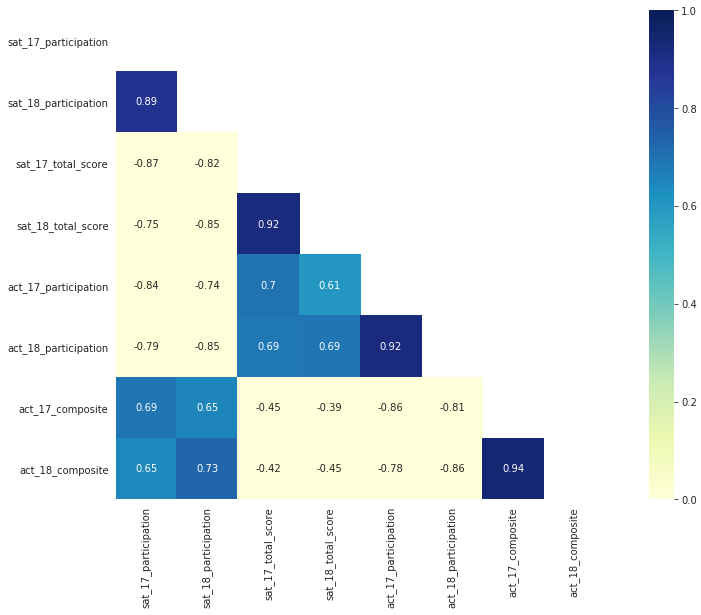

In [54]:
#sns.pairplot(df[['has_heart_disease', 'ca','old_peak', 'max_heart_rate']])
#sns.heatmap(df.corr(), cmap = 'coolwarm',annot = True) #"YlGnBu"

plt.figure(figsize=(16, 9))

corr = final[['sat_17_participation',
                   'sat_18_participation',
                   'sat_17_total_score',
                   'sat_18_total_score',
                   'act_17_participation',
                   'act_18_participation',
                   'act_17_composite',
                   'act_18_composite']].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask , vmin=0, vmax=1, square=True, cmap = 'YlGnBu', annot=True)

 


In [55]:
final.columns

Index(['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
      dtype='object')

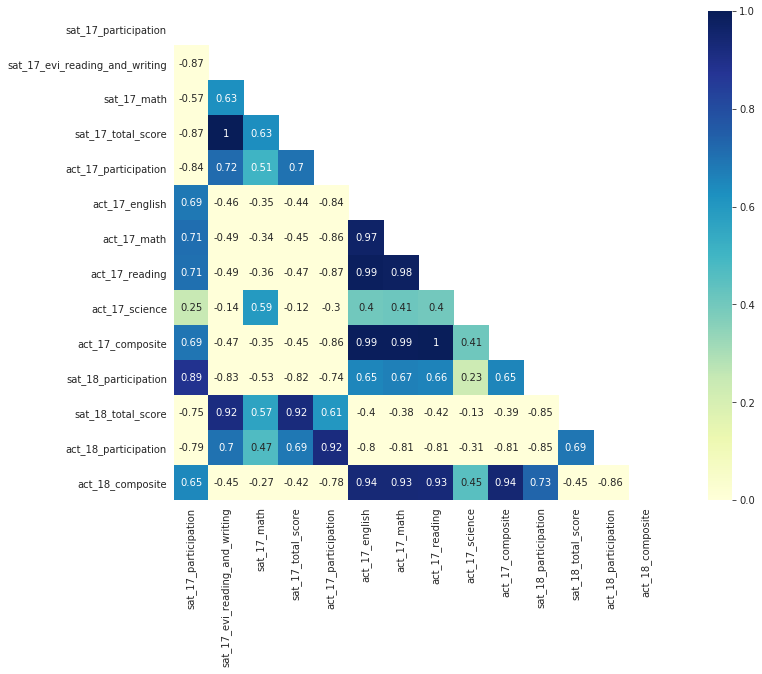

In [57]:
plt.figure(figsize=(16, 9))

corr = final[['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite']].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask , vmin=0, vmax=1, square=True, cmap = 'YlGnBu', annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [58]:
#nrows = int(np.ceil(len(final.columns)/2)) # Makes sure you have enough rows
#plt.subplots(nrows=nrows, ncols=2, figsize = (12,6))

In [59]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,6))# You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])# feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
    fig.tight_layout();


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

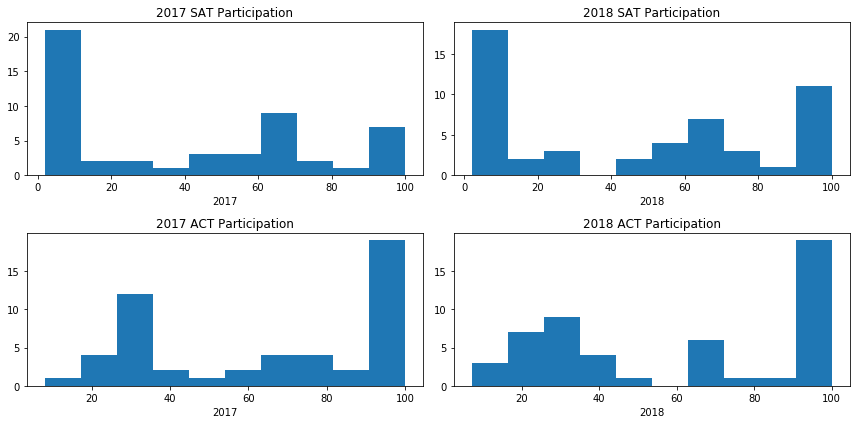

In [60]:
# Code Participation rates for SAT & ACT
subplot_histograms(final, ['sat_17_participation', 'sat_18_participation','act_17_participation','act_18_participation'],
                   ['2017 SAT Participation', '2018 SAT Participation','2017 ACT Participation', '2018 ACT Participation'], 
                   ['2017', '2018','2017', '2018']
                  )



In [61]:
final.columns

Index(['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
      dtype='object')

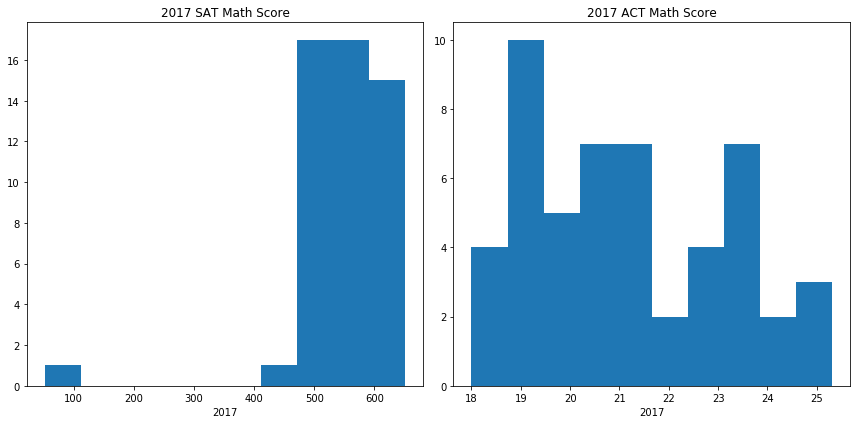

In [62]:
# Code Math score for SAT & ACT
subplot_histograms(final, ['sat_17_math','act_17_math'],
                   ['2017 SAT Math Score', '2017 ACT Math Score'], 
                   ['2017','2017'])

In [63]:
final.columns

Index(['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
      dtype='object')

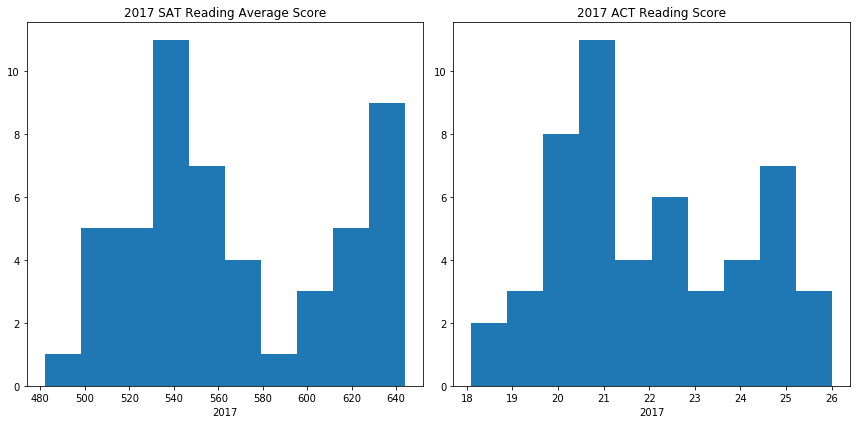

In [64]:
#Reading/verbal scores for SAT & ACT

subplot_histograms(final, ['sat_17_evi_reading_and_writing','act_17_reading'],
                   ['2017 SAT Reading Average Score', '2017 ACT Reading Score'], 
                   ['2017','2017']
                  )


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [65]:
final.columns

Index(['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
      dtype='object')

In [66]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column[0]], dataframe[column[1]] ) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
    fig.tight_layout()

In [67]:
columns = [('sat_17_math','act_17_math'), #SAT vs. ACT math scores for 2017
           ('sat_17_evi_reading_and_writing', 'act_17_reading'), #SAT vs. ACT verbal/reading scores for 2017
           ('sat_17_evi_reading_and_writing', 'act_17_composite'), #SAT vs. ACT total/composite scores for 2017
           ('sat_17_total_score','sat_18_total_score'),# Total scores for SAT 2017 vs. 2018
           ('act_17_composite', 'act_18_composite'),] #Composite scores for ACT 2017 vs. 2018

titles = ['SAT vs. ACT Math Scores 2017',
          'SAT vs. ACT Verbal/Reading Scores 2017',
          'SAT vs. ACT Total/Composite Scores 2017',
          'SAT Total Score 2017 vs. 2018', 
          'Composite Scores 2017 vs. 2018']
xlables = ['sat_17_math',
           'sat_17_evi_reading_and_writing',
           'sat_17_evi_reading_and_writing',
           'sat_17_total_score',
           'act_17_composite']
ylables = ['act_17_math',
           'act_17_reading',
           'act_17_composite',
           'sat_18_total_score',
           'act_18_composite']

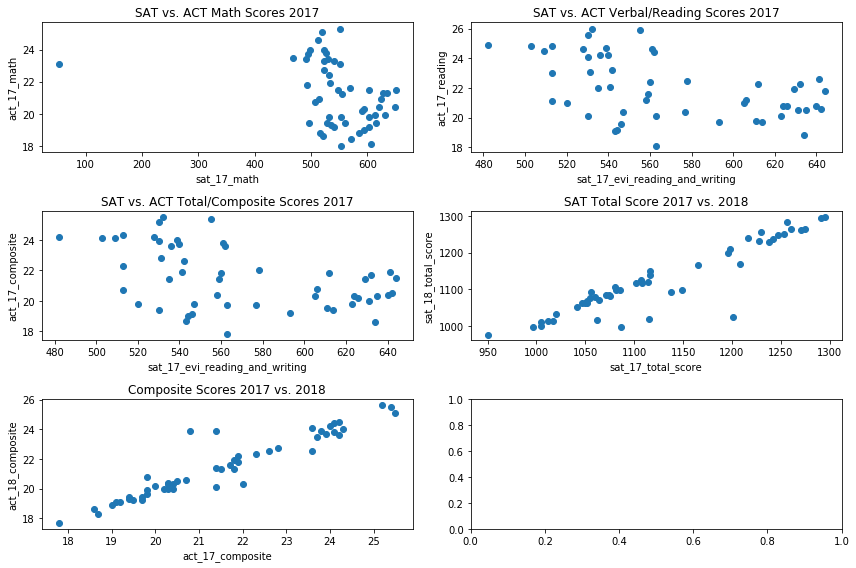

In [68]:
subplot_scatter(final, columns, titles, xlables, ylables)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [69]:
final.columns

Index(['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
      dtype='object')

#### TOTAL SAT SCORE : 2017 vs 2018

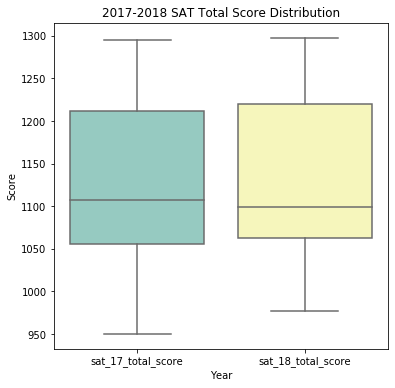

In [70]:
plt.figure(figsize = (6,6))
plt.title("2017-2018 SAT Total Score Distribution")
plt.xlabel(xlabel = "Year")
plt.ylabel(ylabel = "Score")
ax = sns.boxplot(data= final[['sat_17_total_score', 'sat_18_total_score']],palette="Set3");

#### SAT Participation : 2017 vs 2018

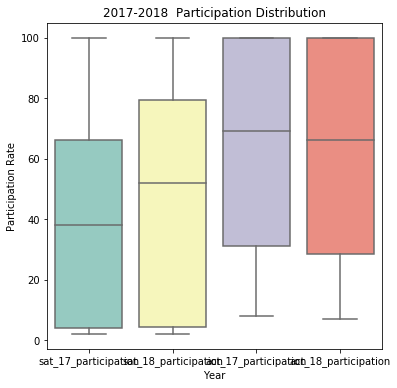

In [71]:
plt.figure(figsize = (6,6))
plt.title("2017-2018  Participation Distribution")
plt.xlabel(xlabel = "Year")
plt.ylabel(ylabel = "Participation Rate")
ax = sns.boxplot(data= final[['sat_17_participation', 'sat_18_participation', 
                              'act_17_participation', 'act_18_participation']],palette="Set3");


#### ACT Participation: 2017 vs 2018

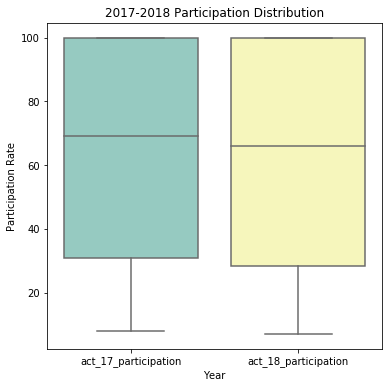

In [72]:
plt.figure(figsize = (6,6))
plt.title("2017-2018 Participation Distribution")
plt.xlabel(xlabel = "Year")
plt.ylabel(ylabel = "Participation Rate")
ax =sns.boxplot(data= final[['act_17_participation', 'act_18_participation']],palette="Set3");

#### ACT Composite : 2017 vs 2018

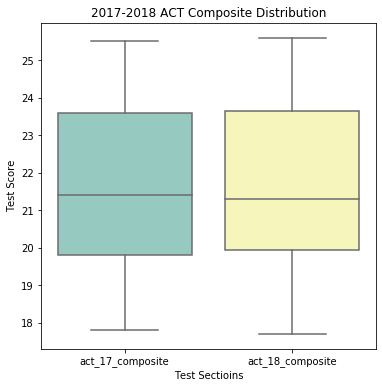

In [73]:
plt.figure(figsize = (6,6))
plt.title("2017-2018 ACT Composite Distribution")
plt.xlabel(xlabel = "Test Sectioins")
plt.ylabel(ylabel = "Test Score")
ax =sns.boxplot(data= final[['act_17_composite', 'act_18_composite']],palette="Set3");


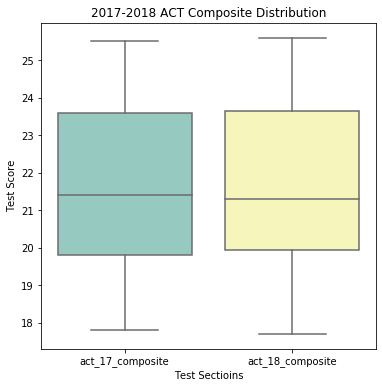

In [74]:
plt.figure(figsize = (6,6))
plt.title("2017-2018 ACT Composite Distribution")
plt.xlabel(xlabel = "Test Sectioins")
plt.ylabel(ylabel = "Test Score")
ax =sns.boxplot(data= final[['act_17_composite', 'act_18_composite']],palette="Set3");


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [75]:
final.columns

Index(['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
      dtype='object')

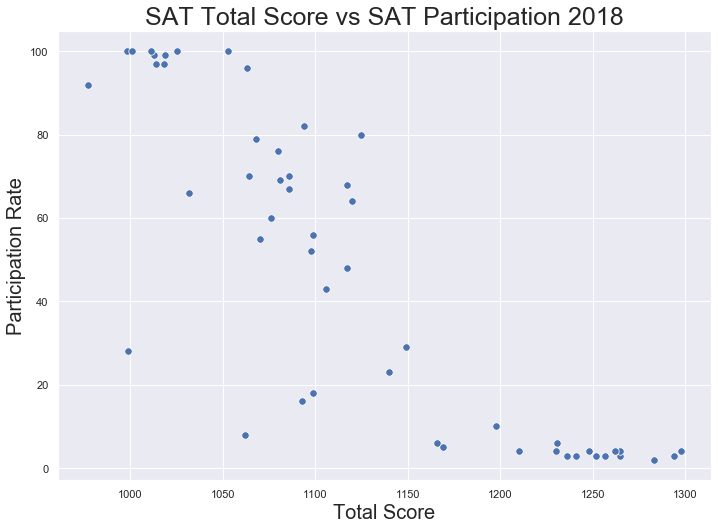

In [77]:
ax = sns.scatterplot(final['sat_18_total_score'], final['sat_18_participation'], s = 55)
ax.set_xlabel('Total Score', fontsize = 20)
ax.set_ylabel('Participation Rate',fontsize = 20)
plt.title('SAT Total Score vs SAT Participation 2018', fontsize = 25);
sns.set(rc={'figure.figsize':(11.7,8.27)})

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [79]:
def subplot_histograms_1(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize = (14,14))# You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])# feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
    fig.tight_layout();

In [80]:
final.columns

Index(['state', 'sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
      dtype='object')

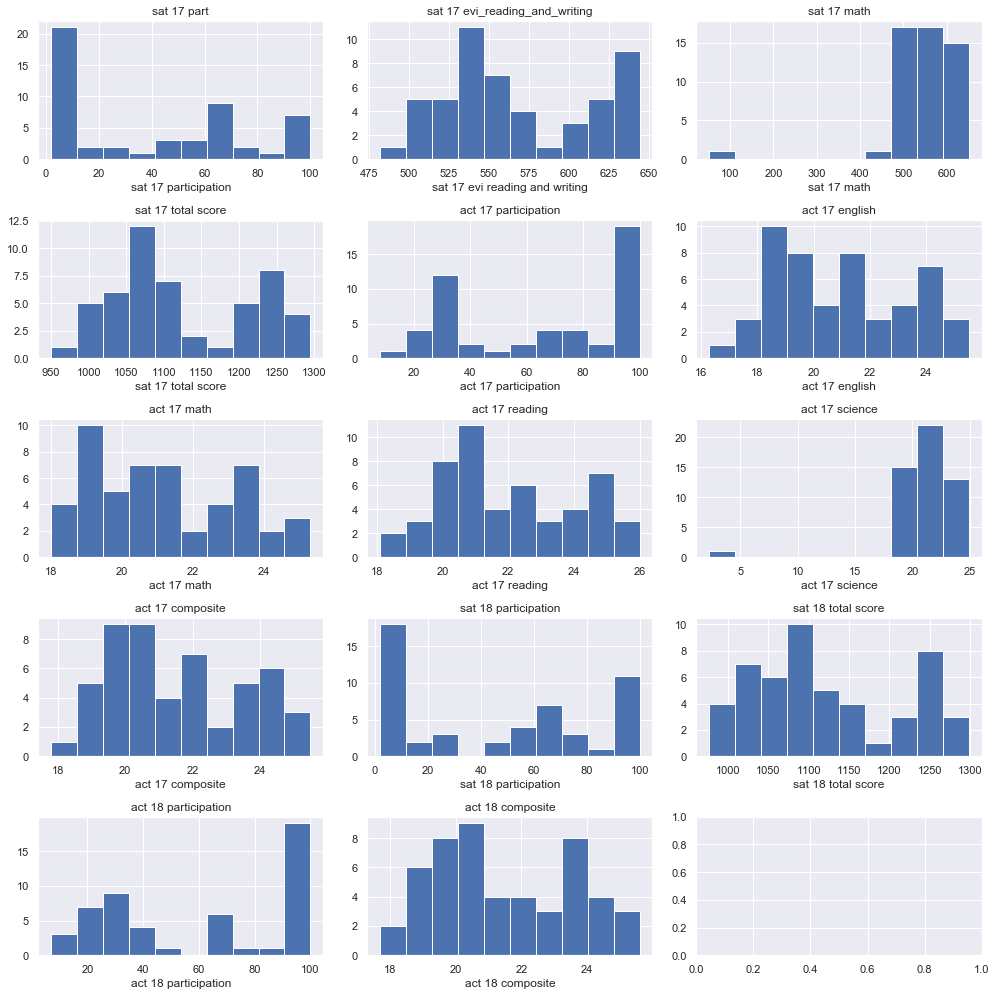

In [81]:
subplot_histograms_1(final, ['sat_17_participation', 'sat_17_evi_reading_and_writing',
       'sat_17_math', 'sat_17_total_score', 'act_17_participation',
       'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
       'act_17_composite', 'sat_18_participation', 'sat_18_total_score',
       'act_18_participation', 'act_18_composite'],
                   ['sat 17 part', 'sat 17 evi_reading_and_writing',
       'sat 17 math', 'sat 17 total score', 'act 17 participation',
       'act 17 english', 'act 17 math', 'act 17 reading', 'act 17 science',
       'act 17 composite', 'sat 18 participation', 'sat 18 total score',
       'act 18 participation', 'act 18 composite'],
                     ['sat 17 participation', 'sat 17 evi reading and writing',
       'sat 17 math', 'sat 17 total score', 'act 17 participation',
       'act 17 english', 'act 17 math', 'act 17 reading', 'act 17 science',
       'act 17 composite', 'sat 18 participation', 'sat 18 total score',
       'act 18 participation', 'act 18 composite'] )

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, since we have large sample population which will be fall in the central limit theorem. However, we don't observe this trend apply to all data of the varibles giving we have large size of population. for exmaple, the 2018 SAT Participation Rate has two extremely high tail at both ends.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 
    - Math: No, 2017 Math does not follow the normal distribution, the majority of the data falls into the 500-600 range, so I assume the mean will be around. However, we also see some data falls the 100s, it indicate that some of the state might have low participation rate and low performnace. For 2017 ACT Math, we have similar mean for both end which unlikey will happen if the distribution is normal. So we will start to look the way we pick our sampling from each state.
    - Reading: No, Reading has same problem as above.Every reading  
    - Rates: No, the participation rate for ACT for 2017 and 2018 both following the same trend, however, they are not normal distribution. The sample of population is biased which drive the distribution become skewed.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

It does not make sense that we can conduct a statistical inference on population size and rate since we know the sample population is biased. So we can't make these statistic to genernalize on the whole popluation. For example.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

It is not appropriate because the sample data is not represetive for the whole population.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Hypothesis testing is to test p values to derive statistical significance when alpha is less than 0.05 has a major weakness. But when the sample size get really large, the p value can be close to 0. In this case, we will use t-test, but perform this test, both samples must be normally distributed. Since Most of the variables are not normal distributed. Thus, I feel it is NOT appropriate to run hypothesis test.



## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [161]:
sat_3_states = final[['state', 'act_17_participation','act_17_composite','act_18_participation',
                      'act_18_composite']].iloc[[5,11,38], [0,1,2,3,4]]

In [162]:
sat_3_states

,state,act_17_participation,act_17_composite,act_18_participation,act_18_composite
5,Colorado,100,20.8,30,23.9
11,Hawaii,90,19.0,89,18.9
38,Pennsylvania,23,23.7,20,23.5


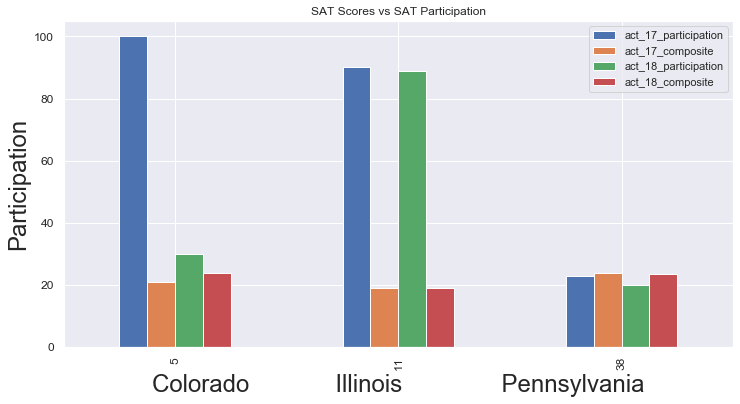

In [164]:
ax = sat_3_states.plot(kind='bar', 
                       title ="SAT Scores vs SAT Participation", figsize=(12, 6),
                       legend=True, fontsize=12)
ax.set_xlabel("Colorado             Illinois               Pennsylvania", fontsize=24)
ax.set_ylabel("Participation", fontsize=24)
plt.show()

The reason although Colorado has 100% participation rate but the score tend to low is because the state has to change to SAT in 2017. So I believe some students will spend more time to study/explore SAT format or even to prepare both exams.

SOURCES:
https://www.denverpost.com/2015/12/23/colorado-juniors-will-take-sat-college-entrance-exam-not-act/
https://www.testive.com/colorado-sat-change-2017/

Pennsylvania has relative stable trend in Pennsylvania. 

Illiois has relative high participation rate but relative low score.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [294]:
# try to find out the difference of SAT participation rate between 2017 and 2018
final['sat_participation_change'] = final['sat_18_participation'] -final['sat_17_participation']


In [355]:
# call out the first 5 columns
df_sat = final[['state','sat_17_participation', 
       'sat_18_participation','sat_participation_change']].sort_values(by = 'sat_participation_change', ascending = False).head()

In [341]:
df.iloc[15:16 , [0,1,2,3]]

,state,sat_17_participation,sat_18_participation,sat_participation_change
38,Pennsylvania,65,70,5


In [342]:
final['act_participation_change'] = final['act_18_participation'] -final['act_17_participation']

In [379]:
df_act = final[['state','act_17_participation', 
       'act_18_participation','act_participation_change']].sort_values(by = 'act_participation_change', ascending =True)

In [384]:
df_act.iloc[15:16 , [0,1,2,3]]

,state,act_17_participation,act_18_participation,act_participation_change
38,Pennsylvania,23,20,-3


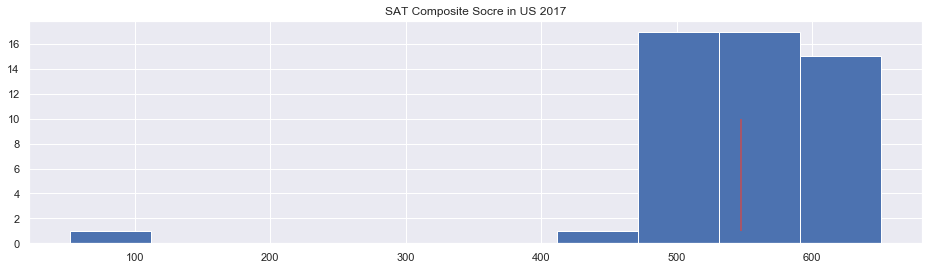

In [106]:

plt.figure(figsize = (16,9))
ax1 = plt.subplot(211) # means 3 rows of plot, and this is the first one
ax1.set_title('SAT Composite Socre in US 2017')
ax1.hist(final['sat_17_math'])
ax1.vlines(x = np.mean(final['sat_17_math']), ymin = 1, ymax = 10, color = 'r');


Pennsylvinia has relative low SAT participation rate around 22% (source: www.education.pa.gov)and also only 82,000 students out of 502000 enrolled high schools students attend either SAT or ACT test(souce: ACS report). It indicated that most of students tend to take other path instead of taking further education. If we want to increase the participation rate of Penn, we should look at the correlation between household income and SAT participation, if it has positive correlation, we should consider to provide discount/waver/career assistance/scholarship for low income household.In addtion to that, we can also partner with schools to provide after school SAT prep program and delivery the message of importance of college (or SAT).